In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Test.csv to Test.csv
Saving Training.csv to Training.csv
User uploaded file "Test.csv" with length 3288 bytes
User uploaded file "Training.csv" with length 10420 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv(r"Training.csv")
df_test=pd.read_csv(r"Test.csv")

In [ ]:
df

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [ ]:
(df['Total Volume Donated (c.c.)']/df['Number of Donations']).value_counts(dropna=False)

250.0    576
dtype: int64

In [ ]:
#We know all of them are 576, so this can be dropped
df=df.drop(labels=['Total Volume Donated (c.c.)','Unnamed: 0'],axis=1)

In [ ]:
#df['Months since First Donation']=df['Months since First Donation']
#df['Months since Last Donation']=df['Months since Last Donation']

In [ ]:
df['NumberOfDonationsPerMonth']=(df['Number of Donations'])/(((df['Months since First Donation']+1)-(df['Months since Last Donation'])))

In [ ]:
def bucketized_plot(dataframe,col,bins,target='Made Donation in March 2007'):
    dataframe=dataframe.copy()
    dataframe['bucket']=pd.cut(dataframe[col],bins=bins,include_lowest=True)
     
   
    
    dataframe_group=dataframe.groupby('bucket').agg({target:['sum','count']}).reset_index()
    dataframe_group.columns=dataframe_group.columns.map('_'.join)
    
    target_sum=target+'_sum'
    target_count=target+'_count'
    dataframe_group['Ratio']=dataframe_group[target_sum]/dataframe_group[target_count]
    
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,6))
    plt.subplots_adjust(left=2,right=3)
    sns.countplot(x='bucket',hue=target,data=dataframe.sort_values(by=col),ax=ax1)
    ax1.set_xticklabels(rotation=90,labels=ax1.get_xticklabels())    

    sns.barplot(x='bucket_',y='Ratio',data=dataframe_group.sort_values(by='bucket_'),ax=ax2,color='b')
    
    ax2.set_xticklabels(rotation=90,labels=ax2.get_xticklabels())
    plt.show()

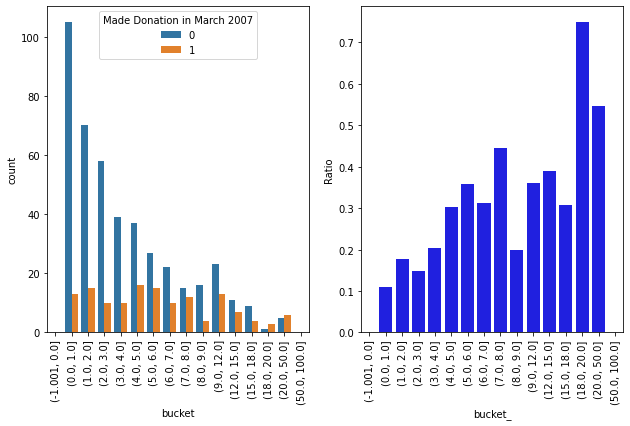

In [ ]:
bucketized_plot(df,'Number of Donations',bins=[-1,0,1,2,3,4,5,6,7,8,9,12,15,18,20,50,100])

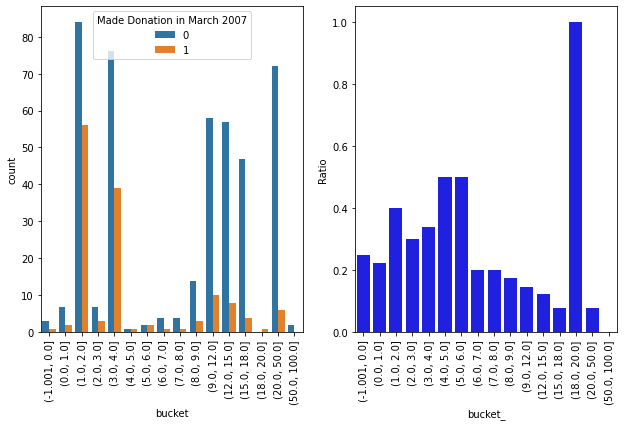

In [ ]:
bucketized_plot(df,'Months since Last Donation',bins=[-1,0,1,2,3,4,5,6,7,8,9,12,15,18,20,50,100])

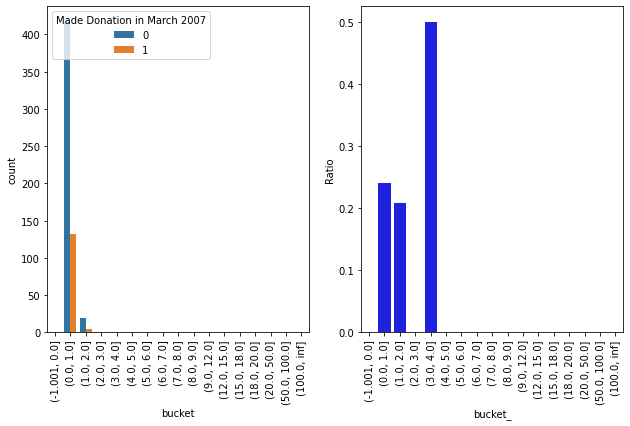

In [ ]:
bucketized_plot(df,'NumberOfDonationsPerMonth',bins=[-1,0,1,2,3,4,5,6,7,8,9,12,15,18,20,50,100,np.inf])

In [ ]:
df['diff']=df['Months since First Donation']-df['Months since Last Donation']

In [ ]:
def categorization_frequency(permonth,number):
    if permonth==np.inf:
        freq=number
    else: freq=permonth
    
    return freq

In [ ]:
df['NumberOfDonationsPerMonth']=np.vectorize(categorization_frequency)(df['NumberOfDonationsPerMonth'].values,df['Number of Donations'].values)

In [ ]:
df['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [ ]:
df

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,NumberOfDonationsPerMonth,diff
0,2,50,98,1,0.515464,96
1,0,13,28,1,0.448276,28
2,1,16,35,1,0.457143,34
3,2,20,45,1,0.454545,43
4,1,24,77,0,0.311688,76
...,...,...,...,...,...,...
571,23,1,23,0,1.000000,0
572,16,3,86,0,0.042254,70
573,21,2,52,0,0.062500,31
574,39,1,39,0,1.000000,0


In [ ]:
df.describe()

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,NumberOfDonationsPerMonth,diff
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,34.050347,0.239583,0.497747,24.611111
std,8.175454,5.740010,24.227672,0.427200,0.535752,24.078599
min,0.000000,1.000000,2.000000,0.000000,0.033333,0.000000
25%,2.000000,2.000000,16.000000,0.000000,0.157895,0.750000
50%,7.000000,4.000000,28.000000,0.000000,0.269563,19.000000
75%,14.000000,7.000000,49.250000,0.000000,1.000000,40.250000
max,74.000000,50.000000,98.000000,1.000000,5.000000,96.000000


## Plotting Functions

In [ ]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_curve ( y_true,y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    sns.set_style('whitegrid')
    
    plt.figure(figsize=(10,10))
    plt.plot(thresholds,precision[:-1],'b--',label='precision')
    plt.plot(thresholds,recall[:-1],'g--',label='recall')
    plt.xlabel('Threshold')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    


  

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
def plot_confusion_matrix ( y_true,y_pred,class_labels):
  ''' builds confusion matrix'''

  

  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,
              annot_kws = {'size':20},fmt='d',
              xticklabels= class_labels,
              yticklabels = class_labels)
  plt.ylabel('Rows = Actual label')
  plt.xlabel ('Columns = Predicted Label')
  plt.gca().set_ylim((0,len(y_true.unique())))

  plt.show()

  print(classification_report(y_true,y_pred))

## Splitting

In [ ]:
import xgboost as xgb

In [ ]:

from sklearn.model_selection import train_test_split

X=df.drop(labels=['Made Donation in March 2007'],axis=1)
y=df['Made Donation in March 2007']

In [ ]:
X_train_org,X_test,y_train_org,y_test=train_test_split(X,y,test_size=0.15)
X_train,X_val,y_train,y_val=train_test_split(X_train_org,y_train_org,train_size=0.8)


## Removing Outliers

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf=IsolationForest(n_estimators=10)

In [ ]:
clf = IsolationForest(behaviour='new', max_samples=50,max_features=1.0,
                      random_state=11, contamination='auto')

In [ ]:
y_pred_train=clf.fit_predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [ ]:
X_train=X_train[y_pred_train==1]
y_train=y_train[y_pred_train==1]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 476 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Months since Last Donation   261 non-null    int64  
 1   Number of Donations          261 non-null    int64  
 2   Months since First Donation  261 non-null    int64  
 3   NumberOfDonationsPerMonth    261 non-null    float64
 4   diff                         261 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 12.2 KB


## Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm =SMOTE(random_state=42)

In [ ]:
X_res,y_res=sm.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train=pd.DataFrame(data=X_res,columns=X_val.columns)

In [ ]:
y_train=pd.Series(y_res)

In [ ]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 192, 1: 192})


### Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [ ]:
rbs=StandardScaler().fit(X_train)

X_train=rbs.transform(X_train)

In [ ]:
X_train

array([[ 0.77246977,  0.49237717,  0.20178948, -0.35471281, -0.0802874 ],
       [-0.81159975, -0.87369383, -0.69637601, -0.89591861, -0.40312052],
       [ 0.77246977,  1.17541267,  1.03580028, -0.58167008,  0.75907872],
       ...,
       [-0.74967134,  1.05524948,  0.84333625, -0.73161312,  1.12376067],
       [ 0.75019995,  1.18158573,  1.03232143, -0.58172032,  0.76374698],
       [ 1.20711532,  0.15085942,  0.87423835, -0.77935966,  0.43703412]])

In [ ]:
X_val=rbs.transform(X_val)
X_test=rbs.transform(X_test)

In [ ]:
X_train=pd.DataFrame(data=X_train,columns=X_train_org.columns)
X_val=pd.DataFrame(data=X_val,columns=X_train_org.columns)
X_test=pd.DataFrame(data=X_test,columns=X_train_org.columns)

In [ ]:
X_train_org=rbs.transform(X_train_org)
X_train_org=pd.DataFrame(data=X_train_org,columns=X_train.columns)

## XGB Matrices

In [ ]:
dtrain = xgb.DMatrix(X_train,label=y_train)
dval =  xgb.DMatrix(X_val,label=y_val)
dtest = xgb.DMatrix(X_test,label=y_test)

In [ ]:
y_train.value_counts()

1    192
0    192
dtype: int64

In [ ]:
y_train.count()/y_train.sum()-1

1.0

In [ ]:
param={'booster': 'gbtree',
 'colsample_bytree': 0.9027142117890113,
 'gamma': 0.14821459783080804,
 'learning_rate': 0.30000000000000004,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 20,
 'reg_alpha': 0.15,
 'reg_lambda': 0.5,
 'subsample': 0.1826362668799407}

In [ ]:

param['eval_metric'] = ['auc','logloss']
param['scale_pos_weight']=y_train.count()/y_train.sum()-1

evallist = [ (dtrain, 'train'),(dval, 'eval')]
num_round = 1000
bst = xgb.train(param, dtrain, num_round,evallist,
early_stopping_rounds=20)

[0]	train-auc:0.804932	train-logloss:0.586139	eval-auc:0.470918	eval-logloss:0.708214
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 20 rounds.
[1]	train-auc:0.839043	train-logloss:0.529785	eval-auc:0.459184	eval-logloss:0.739215
[2]	train-auc:0.859755	train-logloss:0.487916	eval-auc:0.579592	eval-logloss:0.676738
[3]	train-auc:0.879259	train-logloss:0.44795	eval-auc:0.574235	eval-logloss:0.6543
[4]	train-auc:0.892958	train-logloss:0.504148	eval-auc:0.585204	eval-logloss:1.00837
[5]	train-auc:0.904799	train-logloss:0.403275	eval-auc:0.614541	eval-logloss:1.01024
[6]	train-auc:0.905165	train-logloss:0.569186	eval-auc:0.603316	eval-logloss:1.48551
[7]	train-auc:0.910021	train-logloss:0.386767	eval-auc:0.590051	eval-logloss:1.24321
[8]	train-auc:0.919488	train-logloss:0.364619	eval-auc:0.585969	eval-logloss:1.44084
[9]	train-auc:0.920044	train-logloss:0.375807	eval-auc:0.584949	eval-logloss:1.10244


In [ ]:

from sklearn.metrics import confusion_matrix,classification_report,log_loss,roc_curve,auc

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [ ]:
def hyperopt_objective(params):
    model =xgb.XGBClassifier(
            max_depth=int(params['max_depth']),
            min_child_weight=int(params['min_child_weight']),
            learning_rate=params['learning_rate'],
            n_estimators=params['n_estimators'],
            colsample_bytree=params['colsample_bytree'],
            subsample=params['subsample'],
            gamma=params['gamma'],
            booster=params['booster'],
            reg_alpha=params["reg_alpha"],
            reg_lambda=params['reg_lambda'],
            scale_pos_weight=3.4,
            objective='binary:logistic',
            
            early_stopping_rounds=50)
    trials=Trials()
    
    cv_data=xgb.cv(dtrain=dtrain,params=model.get_xgb_params(),nfold=10,stratified=True,metrics='logloss')
    
    best_metric=np.min(cv_data['test-logloss-mean'])
    
    return best_metric

In [ ]:
from numpy.random import RandomState

booster_choice=['gbtree', 'gblinear',  'dart']
reg_alpha_choice=[0, 0.15,0.25,0.5, 0.75,1]
reg_lambda_choice=[0,0.25,0.5,1, 1.25, 1.5,2]

params_space ={
    'learning_rate':    hp.quniform('learning_rate',    0.01, 0.5, 0.025),
    'n_estimators': hp.quniform('n_estimators',    10, 100, 10),
    'max_depth':        hp.quniform('max_depth',        1, 5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 20, 1 ),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
    'subsample':        hp.uniform('subsample', 0.1, 1),
    'booster':hp.choice('booster',booster_choice),
    'gamma':        hp.uniform('gamma', 0, 1),
    "reg_alpha":    hp.choice('reg_alpha' ,reg_alpha_choice),
    "reg_lambda":hp.choice('reg_lambda',reg_lambda_choice)
    
}
trials=Trials()
best= fmin(
            hyperopt_objective,
            space=params_space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials,
            rstate=RandomState(123))
        
    
print(best)

100%|██████████| 1000/1000 [05:37<00:00,  2.96it/s, best loss: 0.4725607]
{'booster': 2, 'colsample_bytree': 0.9551885586761667, 'gamma': 0.8788405323444449, 'learning_rate': 0.375, 'max_depth': 5.0, 'min_child_weight': 1.0, 'n_estimators': 60.0, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.2666836608037182}


In [ ]:
for param1,choice_list in zip(['booster','reg_alpha','reg_lambda'],[booster_choice,reg_alpha_choice,reg_lambda_choice]):
    best[param1]=choice_list[best[param1]]



In [ ]:
for param1 in ['max_depth','min_child_weight','n_estimators']:
    best[param1]=int(best[param1])

In [ ]:
param=best

In [ ]:
param

{'booster': 'dart',
 'colsample_bytree': 0.9551885586761667,
 'gamma': 0.8788405323444449,
 'learning_rate': 0.375,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 60,
 'reg_alpha': 0.15,
 'reg_lambda': 0,
 'subsample': 0.2666836608037182}

In [ ]:
param['eval_metric'] = ['logloss']


evallist = [ (dtrain, 'train'),(dval, 'eval')]
num_round = 1000
bst = xgb.train(param, dtrain, num_round,evallist,
early_stopping_rounds=50)

[0]	train-logloss:0.577883	eval-logloss:0.702185
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 50 rounds.
[1]	train-logloss:0.529876	eval-logloss:0.719441
[2]	train-logloss:0.501773	eval-logloss:0.699078
[3]	train-logloss:0.472411	eval-logloss:0.680485
[4]	train-logloss:0.463141	eval-logloss:0.717886
[5]	train-logloss:0.456473	eval-logloss:0.704518
[6]	train-logloss:0.450188	eval-logloss:0.709113
[7]	train-logloss:0.450022	eval-logloss:0.708724
[8]	train-logloss:0.452511	eval-logloss:0.739338
[9]	train-logloss:0.450821	eval-logloss:0.742377
[10]	train-logloss:0.440582	eval-logloss:0.700732
[11]	train-logloss:0.426593	eval-logloss:0.700754
[12]	train-logloss:0.405513	eval-logloss:1.71805
[13]	train-logloss:0.405472	eval-logloss:1.71807
[14]	train-logloss:0.393288	eval-logloss:1.35594
[15]	train-logloss:0.475313	eval-logloss:1.35166
[16]	train-logloss:0.475406	eval-logloss:1.35156
[17]	train-loglo

In [ ]:
confusion_matrix(y_test,bst.predict(dtest)>=0.5)

array([[53, 14],
       [ 9, 11]])

In [ ]:
print(classification_report(y_test,bst.predict(dtest)>=0.5))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        67
           1       0.44      0.55      0.49        20

    accuracy                           0.74        87
   macro avg       0.65      0.67      0.66        87
weighted avg       0.76      0.74      0.75        87



In [ ]:

y_pred=[round(value) for value in bst.predict(dtest)]


In [ ]:
print(log_loss(y_test,bst.predict(dtest)))


nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,bst.predict(dtest)>=0.5)
print(auc(fpr, tpr))

0.6705223880597015


In [ ]:
bst.get_score(importance_type='gain')

{'Months since First Donation': 0.779047430923077,
 'Months since Last Donation': 0.8549973068461539,
 'Number of Donations': 1.7314440003000002,
 'NumberOfDonationsPerMonth': 0.8692606952777777,
 'diff': 0.864393384388889}

In [ ]:
dtrain_org = xgb.DMatrix(X_train_org,label=y_train_org)

In [ ]:
param

{'booster': 'dart',
 'colsample_bytree': 0.9551885586761667,
 'eval_metric': ['logloss'],
 'gamma': 0.8788405323444449,
 'learning_rate': 0.375,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 60,
 'reg_alpha': 0.15,
 'reg_lambda': 0,
 'subsample': 0.2666836608037182}

In [ ]:
dtrain_org

In [ ]:
num_round = 1000
bst = xgb.train(param, dtrain_org,num_boost_round=1000)

In [ ]:
confusion_matrix(y_test,bst.predict(dtest)>=0.5)

array([[54, 13],
       [ 9, 11]])

## Catboost

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 53kB/s 


In [ ]:
from catboost import CatBoostClassifier,Pool,cv

In [ ]:
from catboost.utils import get_gpu_device_count
print('I see %i GPU devices' % get_gpu_device_count())

I see 0 GPU devices


In [ ]:
weight_scale=df['Made Donation in March 2007'].count()/df['Made Donation in March 2007'].sum()-1
weight_scale

3.1739130434782608

In [ ]:
clf=CatBoostClassifier(iterations=1000,early_stopping_rounds=20,scale_pos_weight=weight_scale,
                      loss_function='Logloss',
                       eval_metric='AUC')

clf.fit(X_train,y_train,
        eval_set=(X_val,y_val),plot=True,)


Learning rate set to 0.025129


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7055072	best: 0.7055072 (0)	total: 2.25ms	remaining: 2.25s
1:	test: 0.7710145	best: 0.7710145 (1)	total: 3.88ms	remaining: 1.94s
2:	test: 0.7875362	best: 0.7875362 (2)	total: 8.43ms	remaining: 2.8s
3:	test: 0.7982609	best: 0.7982609 (3)	total: 11.1ms	remaining: 2.76s
4:	test: 0.8066667	best: 0.8066667 (4)	total: 12.9ms	remaining: 2.58s
5:	test: 0.7982609	best: 0.8066667 (4)	total: 14.8ms	remaining: 2.46s
6:	test: 0.8121739	best: 0.8121739 (6)	total: 16.7ms	remaining: 2.37s
7:	test: 0.8162319	best: 0.8162319 (7)	total: 18.7ms	remaining: 2.32s
8:	test: 0.8139130	best: 0.8162319 (7)	total: 20.9ms	remaining: 2.3s
9:	test: 0.8168116	best: 0.8168116 (9)	total: 23.1ms	remaining: 2.28s
10:	test: 0.8191304	best: 0.8191304 (10)	total: 24.9ms	remaining: 2.24s
11:	test: 0.8185507	best: 0.8191304 (10)	total: 26.8ms	remaining: 2.2s
12:	test: 0.8214493	best: 0.8214493 (12)	total: 28.7ms	remaining: 2.18s
13:	test: 0.8168116	best: 0.8214493 (12)	total: 30.6ms	remaining: 2.16s
14:	test: 0.812

In [ ]:
clf.get_feature_importance(data=Pool(X_train,y_train),prettified=True)

,Feature Id,Importances
0,Months since Last Donation,39.818791
1,NumberOfDonationsPerMonth,20.796032
2,Number of Donations,17.404277
3,diff,13.498083
4,Months since First Donation,8.482817


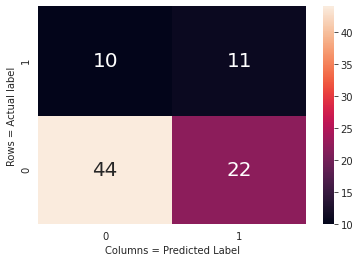

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        66
           1       0.33      0.52      0.41        21

    accuracy                           0.63        87
   macro avg       0.57      0.60      0.57        87
weighted avg       0.70      0.63      0.65        87



In [ ]:
plot_confusion_matrix(y_test,clf.predict(X_test),class_labels=[0,1])

### Tuning Catboost

In [ ]:
clf=CatBoostClassifier(scale_pos_weight=weight_scale,
                      loss_function='Logloss',
                       eval_metric='AUC')


In [ ]:
grid = {'learning_rate': np.arange(0.01,0.5,0.025),
        'depth': range(0,24,2),
        'l2_leaf_reg': range(0,32),
        'bagging_temperature': range(0, 100,10),
    'random_strength':range(0,100,10)
        }
    
randomized_search_result = clf.randomized_search(grid,
                                                   X=X_train.append(X_val),
                                                   y=y_train.append(y_val),cv=10, stratified=True,shuffle=True,
                                                   plot=False,calc_cv_statistics=False)


bestTest = 0.5
bestIteration = 0

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.5000000	best: 0.5000000 (0)	total: 237ms	remaining: 2.13s

bestTest = 0.6919871795
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.6919872	best: 0.6919872 (1)	total: 21.8s	remaining: 1m 27s

bestTest = 0.7067307692
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.7067308	best: 0.7067308 (2)	total: 26.7s	remaining: 1m 2s

bestTest = 0.7022435897
bestIteration = 2

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.7022436	best: 0.7067308 (2)	total: 32.2s	remaining: 48.4s

bestTest = 0.5
best

In [ ]:
def hyperopt_objective(params):
    model =CatBoostClassifier(
            depth=int(params['depth']),
            l2_leaf_reg=int(params['l2_leaf_reg']),
            #random_strength=params['random_strength'],
            #bagging_temperature=params['bagging_temperature'],
            
            #scale_pos_weight=2.87,
            loss_function='Logloss',
            early_stopping_rounds=20,
        logging_level='Silent',
           iterations=1000 
            )
    train_pool=Pool(X_train,label=y_train)
    cv_data=cv(train_pool,params=model.get_params(),stratified=True)
    
    best_metric=np.min(cv_data['test-Logloss-mean'])
    
    return best_metric

In [ ]:
from numpy.random import RandomState




params_space ={
    'learning_rate':    hp.quniform('learning_rate',    0.01, 0.5, 0.025),
    
    'depth':        hp.quniform('depth',        1, 16, 2),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 20, 2 ),
    
    
    #'bagging_temperature':        hp.quniform('bagging_temperature', 0, 100,10),
    #'random_strength':hp.quniform('random_strength',0,100,10)
    
}
trials=Trials()
best= fmin(
            hyperopt_objective,
            space=params_space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials,
            rstate=RandomState(123))
        
    
print(best)

In [ ]:
randomized_search_result['params']

{'bagging_temperature': 30,
 'depth': 10,
 'l2_leaf_reg': 27,
 'learning_rate': 0.385,
 'random_strength': 10}

In [ ]:
params_1=clf.get_params()


In [ ]:
params_1.update(randomized_search_result['params'])

In [ ]:
params_1

{'bagging_temperature': 30,
 'depth': 10,
 'eval_metric': 'AUC',
 'l2_leaf_reg': 27,
 'learning_rate': 0.385,
 'loss_function': 'Logloss',
 'random_strength': 10,
 'scale_pos_weight': 3.1739130434782608}

In [ ]:
clf=CatBoostClassifier(**params_1)


In [ ]:
clf.fit(X_train,y_train,eval_set=(X_val,y_val),plot=True,early_stopping_rounds=20)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5771014	best: 0.5771014 (0)	total: 16.3ms	remaining: 16.3s
1:	test: 0.7133333	best: 0.7133333 (1)	total: 31ms	remaining: 15.5s
2:	test: 0.7246377	best: 0.7246377 (2)	total: 40.9ms	remaining: 13.6s
3:	test: 0.7165217	best: 0.7246377 (2)	total: 43ms	remaining: 10.7s
4:	test: 0.7472464	best: 0.7472464 (4)	total: 51.4ms	remaining: 10.2s
5:	test: 0.7646377	best: 0.7646377 (5)	total: 62.6ms	remaining: 10.4s
6:	test: 0.7721739	best: 0.7721739 (6)	total: 75ms	remaining: 10.6s
7:	test: 0.7800000	best: 0.7800000 (7)	total: 86.3ms	remaining: 10.7s
8:	test: 0.7571014	best: 0.7800000 (7)	total: 87.8ms	remaining: 9.66s
9:	test: 0.7782609	best: 0.7800000 (7)	total: 96.4ms	remaining: 9.54s
10:	test: 0.7730435	best: 0.7800000 (7)	total: 113ms	remaining: 10.2s
11:	test: 0.7736232	best: 0.7800000 (7)	total: 126ms	remaining: 10.3s
12:	test: 0.7800000	best: 0.7800000 (7)	total: 137ms	remaining: 10.4s
13:	test: 0.7944928	best: 0.7944928 (13)	total: 138ms	remaining: 9.73s
14:	test: 0.7944928	best:

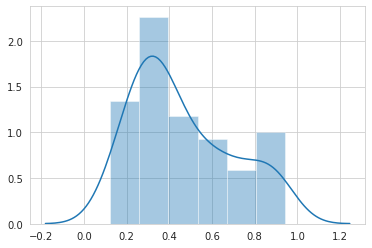

In [ ]:
sns.distplot(clf.predict_proba(X_test)[:,[1]])

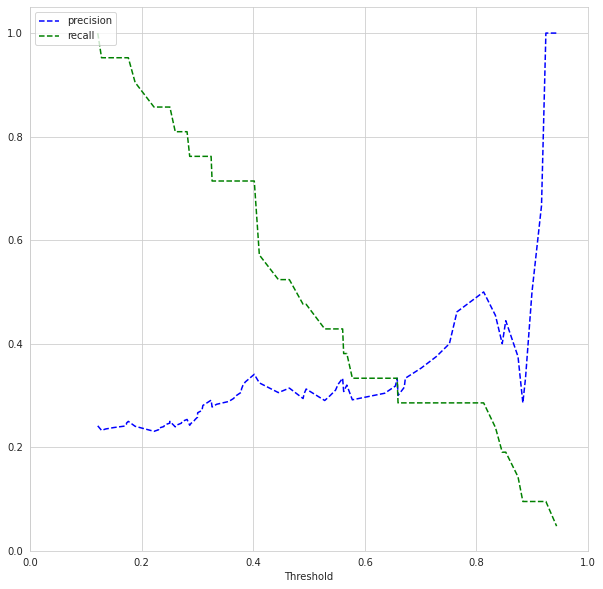

In [ ]:
plot_precision_recall_curve(y_test,clf.predict_proba(X_test)[:,[1]])

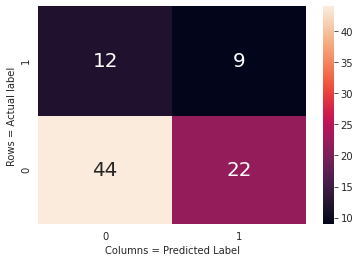

              precision    recall  f1-score   support

           0       0.79      0.67      0.72        66
           1       0.29      0.43      0.35        21

    accuracy                           0.61        87
   macro avg       0.54      0.55      0.53        87
weighted avg       0.67      0.61      0.63        87



In [ ]:

plot_confusion_matrix(y_test,clf.predict(X_test),class_labels=[0,1])

In [ ]:
clf=CatBoostClassifier(**params_1,iterations=30)
clf.fit(X_train.append(X_val),y_train.append(y_val),plot=True,early_stopping_rounds=20)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 16.3ms	remaining: 473ms
1:	total: 24.9ms	remaining: 349ms
2:	total: 33.9ms	remaining: 305ms
3:	total: 43.6ms	remaining: 284ms
4:	total: 55.3ms	remaining: 276ms
5:	total: 67.2ms	remaining: 269ms
6:	total: 70.2ms	remaining: 231ms
7:	total: 83.7ms	remaining: 230ms
8:	total: 95.4ms	remaining: 223ms
9:	total: 107ms	remaining: 214ms
10:	total: 109ms	remaining: 189ms
11:	total: 122ms	remaining: 183ms
12:	total: 126ms	remaining: 165ms
13:	total: 134ms	remaining: 154ms
14:	total: 149ms	remaining: 149ms
15:	total: 164ms	remaining: 144ms
16:	total: 182ms	remaining: 139ms
17:	total: 194ms	remaining: 129ms
18:	total: 201ms	remaining: 117ms
19:	total: 223ms	remaining: 111ms
20:	total: 229ms	remaining: 98.1ms
21:	total: 234ms	remaining: 85ms
22:	total: 239ms	remaining: 72.7ms
23:	total: 253ms	remaining: 63.2ms
24:	total: 263ms	remaining: 52.5ms
25:	total: 274ms	remaining: 42.2ms
26:	total: 284ms	remaining: 31.6ms
27:	total: 294ms	remaining: 21ms
28:	total: 303ms	remaining: 10.4ms
29:	total:

In [ ]:
params_1

{'bagging_temperature': 30,
 'depth': 10,
 'eval_metric': 'AUC',
 'l2_leaf_reg': 27,
 'learning_rate': 0.385,
 'loss_function': 'Logloss',
 'random_strength': 10,
 'scale_pos_weight': 3.1739130434782608}

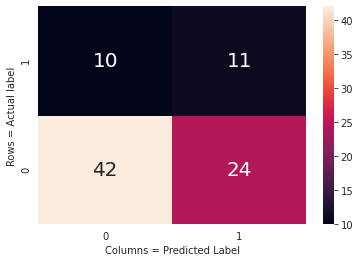

              precision    recall  f1-score   support

           0       0.81      0.64      0.71        66
           1       0.31      0.52      0.39        21

    accuracy                           0.61        87
   macro avg       0.56      0.58      0.55        87
weighted avg       0.69      0.61      0.63        87



In [ ]:
plot_confusion_matrix(y_test,clf.predict(X_test),class_labels=[0,1])

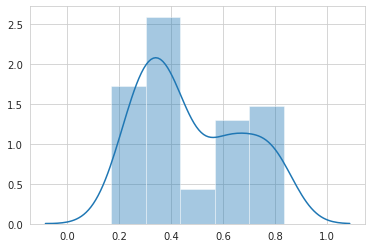

In [ ]:
sns.distplot(clf.predict_proba(X_test)[:,[1]])